In [65]:
# Custom libraries
from datascienceutils import plotter
from datascienceutils import analyze, settings
from datascienceutils import predictiveModels as pm
from datascienceutils import sklearnUtils as sku
settings.MODELS_BASE_PATH='../models'

# Standard libraries
import json
%matplotlib inline
import datetime
import numpy as np
import pandas as pd
import random


from bokeh.plotting import figure, show, output_file, output_notebook, ColumnDataSource
from bokeh.charts import Histogram
import bokeh
output_notebook(bokeh.resources.INLINE)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

Loading BokehJS ...

In [2]:
irisDf = pd.read_csv('../data/problem_dataset.csv')

In [3]:
irisDf.describe()

/home/anand/anaconda3/envs/analytics/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


OCCURRENCE_ID             Y             X      GAUL_AD0  infection_time
count   42066.000000  42066.000000  42066.000000  4.206600e+04    42093.000000
mean    21033.500000     13.124483     63.094441  3.986041e+04        5.469627
std     12143.552549     17.566448     82.068577  1.953122e+05        2.869416
min         1.000000    -38.950000   -179.980000  3.000000e+00        1.000000
25%              NaN           NaN           NaN           NaN        3.000000
50%              NaN           NaN           NaN           NaN        5.000000
75%              NaN           NaN           NaN           NaN        8.000000
max     42066.000000     52.320000    179.860000  1.013965e+06       10.000000

In [4]:
irisDf.head()

Unnamed: 0         VECTOR  OCCURRENCE_ID SOURCE_TYPE LOCATION_TYPE  \
0          0  Aedes aegypti            1.0   published         point   
1          1  Aedes aegypti            2.0   published         point   
2          2  Aedes aegypti            3.0   published         point   
3          3  Aedes aegypti            4.0   published         point   
4          4  Aedes aegypti            5.0   published         point   

  POLYGON_ADMIN     Y      X  YEAR COUNTRY COUNTRY_ID  GAUL_AD0 STATUS  \
0          -999 -3.22  40.07  1958   Kenya        KEN     133.0    NaN   
1          -999 -4.27  15.30  1960   Congo        COG      59.0    NaN   
2          -999 -4.27  15.30  1960   Congo        COG      59.0    NaN   
3          -999 -3.22  40.07  1960   Kenya        KEN     133.0    NaN   
4          -999 -3.04  40.14  1960   Kenya        KEN     133.0    NaN   

  infection_source  infection_time  
0              air               9  
1         mosquito               5  
2         mosquito               7  
3            water               1  
4            water               2

In [5]:
irisDf['POLYGON_ADMIN'].unique()

array(['-999', '2', nan, 'Less than 100km', 'Less than 25km',
       'Less than 10km'], dtype=object)

In [6]:
irisDf['STATUS'].fillna('NA', inplace=True)
irisDf['YEAR'].fillna('NA', inplace=True)
irisDf['SOURCE_TYPE'].fillna('NA', inplace=True)
irisDf['POLYGON_ADMIN'].fillna('NA', inplace=True)

In [7]:
irisDf.var()

OCCURRENCE_ID     1.474659e+08
Y                 3.085801e+02
X                 6.735251e+03
GAUL_AD0          3.814687e+10
infection_time    8.233546e+00
dtype: float64

In [8]:
irisDf.skew()

OCCURRENCE_ID    -1.161637e-17
Y                -1.079129e+00
X                -8.496533e-01
GAUL_AD0          4.771877e+00
infection_time    4.528951e-03
dtype: float64

In [9]:
irisDf.corr()

OCCURRENCE_ID         Y         X  GAUL_AD0  infection_time
OCCURRENCE_ID        1.000000  0.432515  0.396861 -0.206791        0.004040
Y                    0.432515  1.000000  0.566422 -0.093467        0.001087
X                    0.396861  0.566422  1.000000 -0.052476        0.004926
GAUL_AD0            -0.206791 -0.093467 -0.052476  1.000000        0.001704
infection_time       0.004040  0.001087  0.004926  0.001704        1.000000

In [10]:
irisDf.select_dtypes(include=[np.number]).columns

Index(['OCCURRENCE_ID', 'Y', 'X', 'GAUL_AD0', 'infection_time'], dtype='object')

In [11]:
analyze.correlation_analyze(irisDf, exclude_columns='Id', 
                                categories=['VECTOR', 'SOURCE_TYPE', 'LOCATION_TYPE', 'YEAR' ,
                                            'COUNTRY','POLYGON_ADMIN', 'infection_source'], )

# Correlation btw Numerical Columns


# Correlation btw Columns VECTOR & SOURCE_TYPE by count
# Correlation btw Columns VECTOR & LOCATION_TYPE by count
# Correlation btw Columns VECTOR & YEAR by count
# Correlation btw Columns VECTOR & COUNTRY by count
# Correlation btw Columns VECTOR & POLYGON_ADMIN by count
# Correlation btw Columns VECTOR & infection_source by count
# Correlation btw Columns SOURCE_TYPE & LOCATION_TYPE by count
# Correlation btw Columns SOURCE_TYPE & YEAR by count
# Correlation btw Columns SOURCE_TYPE & COUNTRY by count
# Correlation btw Columns SOURCE_TYPE & POLYGON_ADMIN by count
# Correlation btw Columns SOURCE_TYPE & infection_source by count
# Correlation btw Columns LOCATION_TYPE & YEAR by count
# Correlation btw Columns LOCATION_TYPE & COUNTRY by count
# Correlation btw Columns LOCATION_TYPE & POLYGON_ADMIN by count
# Correlation btw Columns LOCATION_TYPE & infection_source by count
# Correlation btw Columns YEAR & COUNTRY by count
# Correlation btw Columns YEAR & POLYGON_ADMIN by count
# Correla

# Pandas correlation coefficients matrix
                OCCURRENCE_ID         Y         X  GAUL_AD0  infection_time
OCCURRENCE_ID        1.000000  0.432515  0.396861 -0.206791        0.004040
Y                    0.432515  1.000000  0.566422 -0.093467        0.001087
X                    0.396861  0.566422  1.000000 -0.052476        0.004926
GAUL_AD0            -0.206791 -0.093467 -0.052476  1.000000        0.001704
infection_time       0.004040  0.001087  0.004926  0.001704        1.000000
# Pandas co-variance coefficients matrix
                OCCURRENCE_ID              Y              X      GAUL_AD0  \
OCCURRENCE_ID    1.474659e+08   92263.603007  395512.897408 -4.904631e+08   
Y                9.226360e+04     308.580109     816.584268 -3.206784e+05   
X                3.955129e+05     816.584268    6735.251340 -8.411426e+05   
GAUL_AD0        -4.904631e+08 -320678.359260 -841142.552660  3.814687e+10   
infection_time   1.407915e+02       0.054800       1.159944  9.552904e+02   


In [12]:
irisDf.head()

Unnamed: 0         VECTOR  OCCURRENCE_ID SOURCE_TYPE LOCATION_TYPE  \
0          0  Aedes aegypti            1.0   published         point   
1          1  Aedes aegypti            2.0   published         point   
2          2  Aedes aegypti            3.0   published         point   
3          3  Aedes aegypti            4.0   published         point   
4          4  Aedes aegypti            5.0   published         point   

  POLYGON_ADMIN     Y      X  YEAR COUNTRY COUNTRY_ID  GAUL_AD0 STATUS  \
0          -999 -3.22  40.07  1958   Kenya        KEN     133.0     NA   
1          -999 -4.27  15.30  1960   Congo        COG      59.0     NA   
2          -999 -4.27  15.30  1960   Congo        COG      59.0     NA   
3          -999 -3.22  40.07  1960   Kenya        KEN     133.0     NA   
4          -999 -3.04  40.14  1960   Kenya        KEN     133.0     NA   

  infection_source  infection_time  
0              air               9  
1         mosquito               5  
2         mosquito               7  
3            water               1  
4            water               2

In [13]:
irisDf.groupby('infection_time').sum()

OCCURRENCE_ID             Y              X     GAUL_AD0
infection_time                                                         
1                  90284470.0  56248.357739  269714.084304  172275162.0
2                  88925877.0  55458.632437  264169.444308  171198874.0
3                  89778629.0  56400.023396  278216.816323  162154520.0
4                  88724893.0  54035.926489  257929.282360  149922566.0
5                  86282326.0  55170.807230  261861.550212  185343399.0
6                  88788955.0  55741.108921  264776.159121  155047903.0
7                  87821753.0  54141.033120  255267.970528  184313228.0
8                  89510917.0  57096.985882  267621.070332  161105159.0
9                  88652217.0  54498.301807  269906.598588  179351188.0
10                 86025174.0  53303.329921  264667.780173  156056123.0

In [14]:
analyze.dist_analyze(irisDf)

/home/anand/anaconda3/envs/analytics/lib/python3.5/site-packages/bokeh/core/compat/bokeh_renderer.py:262: UserWarning: Path marker shapes currently not handled, defaulting to Circle
  warnings.warn("Path marker shapes currently not handled, defaulting to Circle")
/home/anand/anaconda3/envs/analytics/lib/python3.5/site-packages/matplotlib/artist.py:224: MatplotlibDeprecationWarning: get_axes has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  stacklevel=1)


Variance of OCCURRENCE_ID
147465868.5
Skewness of OCCURRENCE_ID
0.0
Variance of Y
308.580109152
Skewness of Y
-1.0791294673
Variance of X
6735.2513405
Skewness of X
-0.849653266576
Variance of GAUL_AD0
38146865433.4
Skewness of GAUL_AD0
4.77187706336
Variance of infection_time
8.23354599061
Skewness of infection_time
0.00452895082148
Too many categorise for col: Unnamed: 0 can't plot pie-chart
Too many categorise for col: COUNTRY can't plot pie-chart
Too many categorise for col: LOCATION_TYPE can't plot pie-chart
Too many categorise for col: YEAR can't plot pie-chart
Too many categorise for col: COUNTRY_ID can't plot pie-chart


/home/anand/anaconda3/envs/analytics/lib/python3.5/site-packages/bokeh/core/compat/bokeh_renderer.py:295: UserWarning: Path marker sizes support is limited and may not display as expected
  warnings.warn("Path marker sizes support is limited and may not display as expected")


In [15]:
irisDf['YEAR'] = pd.to_numeric(irisDf['YEAR'], errors='coerce')
analyze.dist_analyze(irisDf, 'YEAR')

Variance of YEAR
58.012606326
Skewness of YEAR
-2.48720150025


/home/anand/anaconda3/envs/analytics/lib/python3.5/site-packages/bokeh/core/compat/bokeh_renderer.py:262: UserWarning: Path marker shapes currently not handled, defaulting to Circle
  warnings.warn("Path marker shapes currently not handled, defaulting to Circle")
/home/anand/anaconda3/envs/analytics/lib/python3.5/site-packages/matplotlib/artist.py:224: MatplotlibDeprecationWarning: get_axes has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  stacklevel=1)
/home/anand/anaconda3/envs/analytics/lib/python3.5/site-packages/bokeh/core/compat/bokeh_renderer.py:295: UserWarning: Path marker sizes support is limited and may not display as expected
  warnings.warn("Path marker sizes support is limited and may not display as expected")


In [16]:
analyze.dist_analyze(irisDf, 'GAUL_AD0')

Variance of GAUL_AD0
38146865433.4
Skewness of GAUL_AD0
4.77187706336


/home/anand/anaconda3/envs/analytics/lib/python3.5/site-packages/bokeh/core/compat/bokeh_renderer.py:262: UserWarning: Path marker shapes currently not handled, defaulting to Circle
  warnings.warn("Path marker shapes currently not handled, defaulting to Circle")
/home/anand/anaconda3/envs/analytics/lib/python3.5/site-packages/matplotlib/artist.py:224: MatplotlibDeprecationWarning: get_axes has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  stacklevel=1)
/home/anand/anaconda3/envs/analytics/lib/python3.5/site-packages/bokeh/core/compat/bokeh_renderer.py:295: UserWarning: Path marker sizes support is limited and may not display as expected
  warnings.warn("Path marker sizes support is limited and may not display as expected")


In [20]:
def impute_values(df):
    # Forcing that one record that uses a year range to NaN.probably should just drop the record.
    df['YEAR'] = pd.to_numeric(df['YEAR'], errors='coerce')
    # Picking randomly from one of top 3 modes
    df['YEAR'].fillna(random.choice([2004, 2005,2013]), inplace=True)
    
    # introduction new category for nan vals(other two are almost equally distributed)
    df['VECTOR'].fillna('NA', inplace=True)
    
    # Imputing SOURCE_TYPE with most popular entry.. almost 5x unpublished entries
    df['SOURCE_TYPE'].fillna('unpublished', inplace=True)
    
    # X and Y both are atleast bi-modal distributions with some outliers. So filling NA with mode values
    df['X'].fillna(df['X'].mode(), inplace=True)
    df['Y'].fillna(df['Y'].mode(), inplace=True)
    
    #Imputing location type with most popular entry.
    df['LOCATION_TYPE'].fillna('point', inplace=True)
    
    # introduction new category for nan vals(other three are almost equally distributed)
    df['infection_source'].fillna('NA', inplace=True)
    
    # imputing polygon admin with most popular -999
    df['POLYGON_ADMIN'].fillna('-999', inplace=True)
    
    # And as it would be there's one COUNTRY without a COUNTRY_ID.. most likely a spelling but can
    # circle back to fixing it when it's time to improve model performance(also can eliminate one of
    # country/country_id)
    df['COUNTRY'].fillna('Taiwan', inplace=True)
    df['COUNTRY_ID'].fillna('TWN', inplace=True)
    
    # STATUS is dominated by E values
    df['STATUS'].fillna('E', inplace=True)
    
    # infection_time is almost uniformly distributed from 1 to 10
    df['infection_time'].fillna(random.choice([1+x for x in range(10)]), inplace=True)
    
    # GAUL_AD0 very skewed picking up mode
    df['GAUL_AD0'].fillna(df['GAUL_AD0'].mode(), inplace=True)
    
impute_values(irisDf)


In [29]:
new_df = pd.DataFrame()
new_df['year'] = irisDf.YEAR.unique()
new_df['occurrences'] = irisDf.groupby('YEAR').count().reset_index()['OCCURRENCE_ID']

In [30]:
analyze.correlation_analyze(new_df)

# Correlation btw Numerical Columns


# Pandas correlation coefficients matrix
                 year  occurrences
year         1.000000     0.582886
occurrences  0.582886     1.000000
# Pandas co-variance coefficients matrix
                     year   occurrences
year           267.017857  1.539969e+04
occurrences  15399.694156  2.614062e+06


## OK The year vs no. of occurrences looks like it's mostly linear except after 2000.. when it becomes logarithmic..

### What's worrying is that there are those 3 outliers.. or extremely high infections, which will not fit even in a logarithmic model, but risk of ignoring them is high too..

### Let's try a cluster analysis.

For clusters = 2 The average silhouette_score is : 0.853372251152


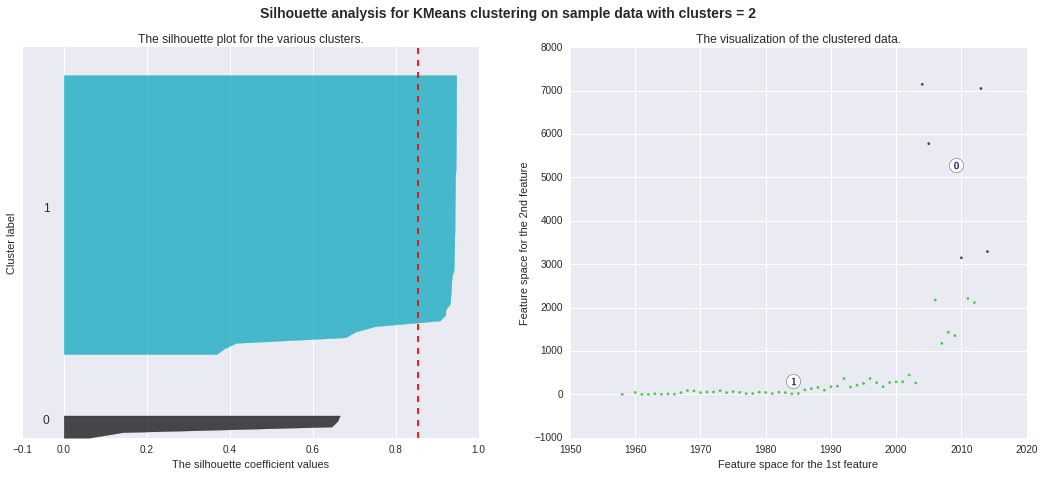

For clusters = 4 The average silhouette_score is : 0.862393864548


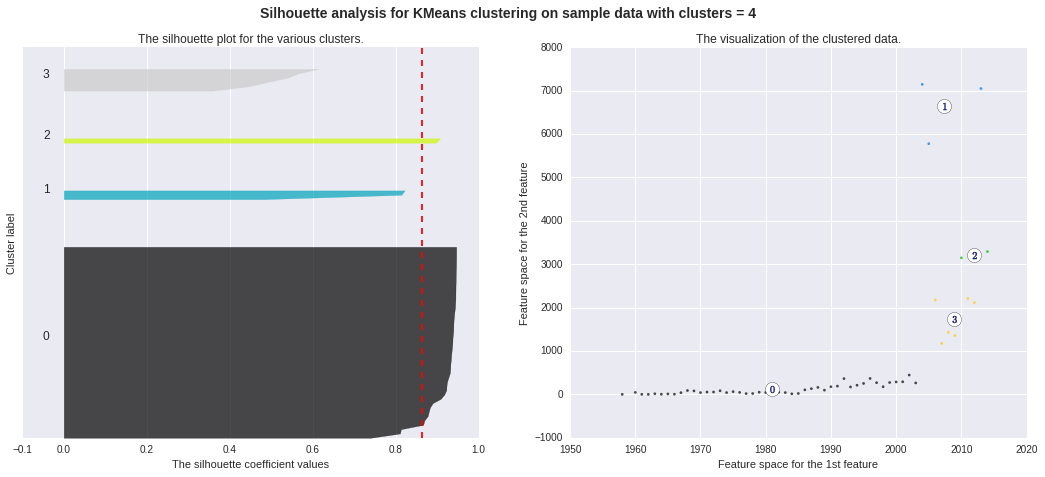

For clusters = 6 The average silhouette_score is : 0.870465287541


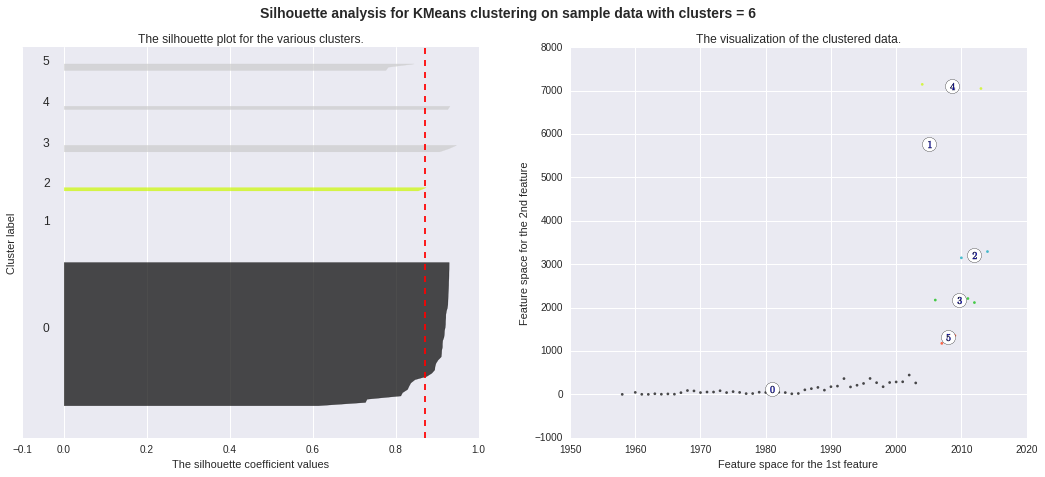

In [31]:
analyze.silhouette_analyze(new_df)

## Hmm.. That 2-cluster approach is still showing outliers within the second cluster ..

### Sigh.. we need more granular data, (i.e: month-wise or even week-wise rather than year-wise).
### Anyways, the question is to predict the infections in the next decade, so let's just group the data and fit it.


In [39]:
new_df['year']

0     1958.0
1     1960.0
2     1961.0
3     1962.0
4     1963.0
5     1964.0
6     1965.0
7     1966.0
8     1967.0
9     1968.0
10    1969.0
11    1972.0
12    1970.0
13    1971.0
14    1973.0
15    1974.0
16    1975.0
17    1976.0
18    1977.0
19    1978.0
20    1979.0
21    1980.0
22    1981.0
23    1982.0
24    1983.0
25    1984.0
26    1985.0
27    1986.0
28    1988.0
29    1987.0
30    1989.0
31    1990.0
32    1991.0
33    1992.0
34    1995.0
35    1993.0
36    1994.0
37    1998.0
38    1996.0
39    1997.0
40    1999.0
41    2000.0
42    2001.0
43    2002.0
44    2003.0
45    2004.0
46    2005.0
47    2006.0
48    2007.0
49    2008.0
50    2009.0
51    2011.0
52    2010.0
53    2012.0
54    2013.0
55    2014.0
Name: year, dtype: float64

In [63]:
dec_df = pd.DataFrame()
decades = ['%d - %ds'%(x-10, x) for x in range(1960,2030, 10)]
end_years = [x for x in range(1960,2030,10)]
occurrences=[]
i_counts = [sum(new_df[(new_df.year < x) & (new_df.year >=x-10)].occurrences) for x in range(1960,2030,10)]
dec_df['decades'] = decades
dec_df['infections'] = i_counts
dec_df['end_years'] = end_years
dec_df['log_infections'] = dec_df['infections'].apply(lambda x: np.log(x))
dec_df

decades  infections  end_years  log_infections
0  1950 - 1960s           1       1960        0.000000
1  1960 - 1970s         293       1970        5.680173
2  1970 - 1980s         477       1980        6.167516
3  1980 - 1990s         684       1990        6.527958
4  1990 - 2000s        2455       2000        7.805882
5  2000 - 2010s       20345       2010        9.920590
6  2010 - 2020s       17811       2020        9.787572

## Ok that clearly fits on a logarithmic scale.. Simplest model is to fit the infections to a log/exponential curve and extrapolate. 
## I'm ignoring timeseries modelling since, there's so few data points.... to find seasonality.. though there clearly is a upward trend and an exponentially upward trend.


In [76]:
from scipy.optimize import curve_fit
def func(x, m, b):
    return m*x + b

popt, pcov = curve_fit(func, dec_df['end_years'], dec_df['log_infections'])

In [77]:
print(popt)

[  1.41006842e-01  -2.74047946e+02]


In [79]:
def predictor(end_year):
    return np.exp2(popt[0]*end_year + popt[1])

print(predictor(2030))
print(predictor(2040))


4691.85864328
12468.6033719


## There we go...  the predicitons are for the decade 2020-2030 : 4691.85 infections
## and for the decade 2030-2040 : 12468.60 infections..

## There's probably scope for improving the accuracy of these by virtue of splitting/grouping them by infection_source and predicting three different models and summing them up. 

## However given the sparsity of data, it'll be hard to show that the ensembled model gives better accuracy.

## Another way to use all the other dimensions, would be to train a linear regression model on (infection source, country, source type,)
## Then for prediction over the next decade iterate over the possible combination of (infection_sources, country, source_types) and add them all up